<a href="https://colab.research.google.com/github/khairihr/MachineLearning/blob/main/TaskWeek8/SVM_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Khairi Hibatullah Ridho

NIM: 1103228240

Dataset Link: https://www.kaggle.com/code/pierra/credit-card-dataset-svm-classification/input?select=creditcard.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd

file_path = '/content/drive/MyDrive/Dataset MachineLearning/creditcard.csv'

df = pd.read_csv(file_path)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

prompt: apakah ada data kosong atau tidak dan hapus data kosongnya

In [4]:
# Cek apakah ada data kosong
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

# Hapus data kosong
df_cleaned = df.dropna()

# Cetak ukuran DataFrame sebelum dan sesudah penghapusan
print(f'Ukuran DataFrame sebelum penghapusan: {df.shape}')
print(f'Ukuran DataFrame setelah penghapusan: {df_cleaned.shape}')

Jumlah data kosong per kolom:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Ukuran DataFrame sebelum penghapusan: (284807, 31)
Ukuran DataFrame setelah penghapusan: (284807, 31)


lakukan EDA dulu untuk dataset ini

Untuk melakukan Exploratory Data Analysis (EDA) pada dataset kartu kredit ini, Anda bisa mempertimbangkan langkah-langkah berikut:

Statistik Deskriptif: Gunakan describe() untuk mendapatkan statistik dasar seperti mean, median, nilai maksimum, dan minimum dari setiap kolom.

Distribusi Kelas: Cek distribusi kelas (kolom 'Class') untuk melihat seberapa imbalance dataset Anda. Ini penting karena dapat mempengaruhi pilihan model dan teknik.

Korelasi antar Fitur: Gunakan corr() untuk menentukan korelasi antara fitur. Hal ini dapat membantu mengidentifikasi fitur yang berpotensi berkorelasi tinggi dengan target, atau antara satu sama lain.

Visualisasi Data:

Histogram untuk setiap fitur untuk melihat distribusinya.
Boxplot untuk melihat adanya outlier.
Heatmap dari matriks korelasi untuk memahami hubungan antar fitur.
Analisis Outlier: Identifikasi dan tangani outlier jika perlu, karena ini dapat mempengaruhi performa model.

In [5]:
# Distribusi Kelas
print("\nDistribusi Kelas:")
print(df['Class'].value_counts())


Distribusi Kelas:
0    284315
1       492
Name: Class, dtype: int64


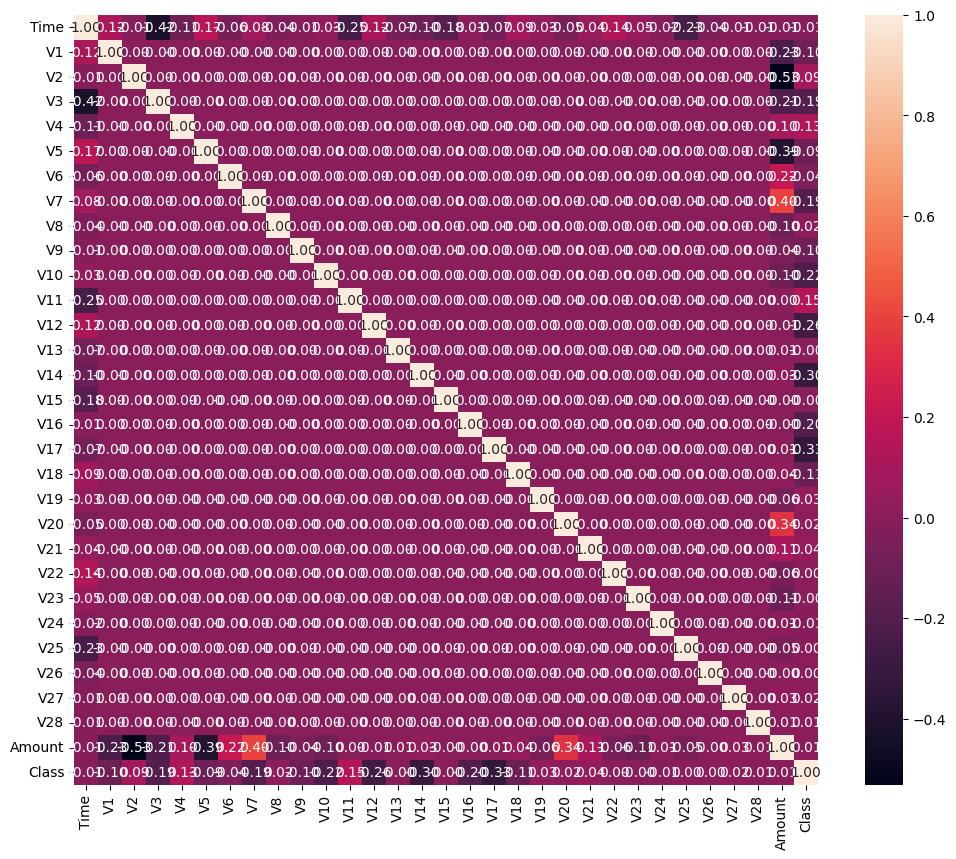

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

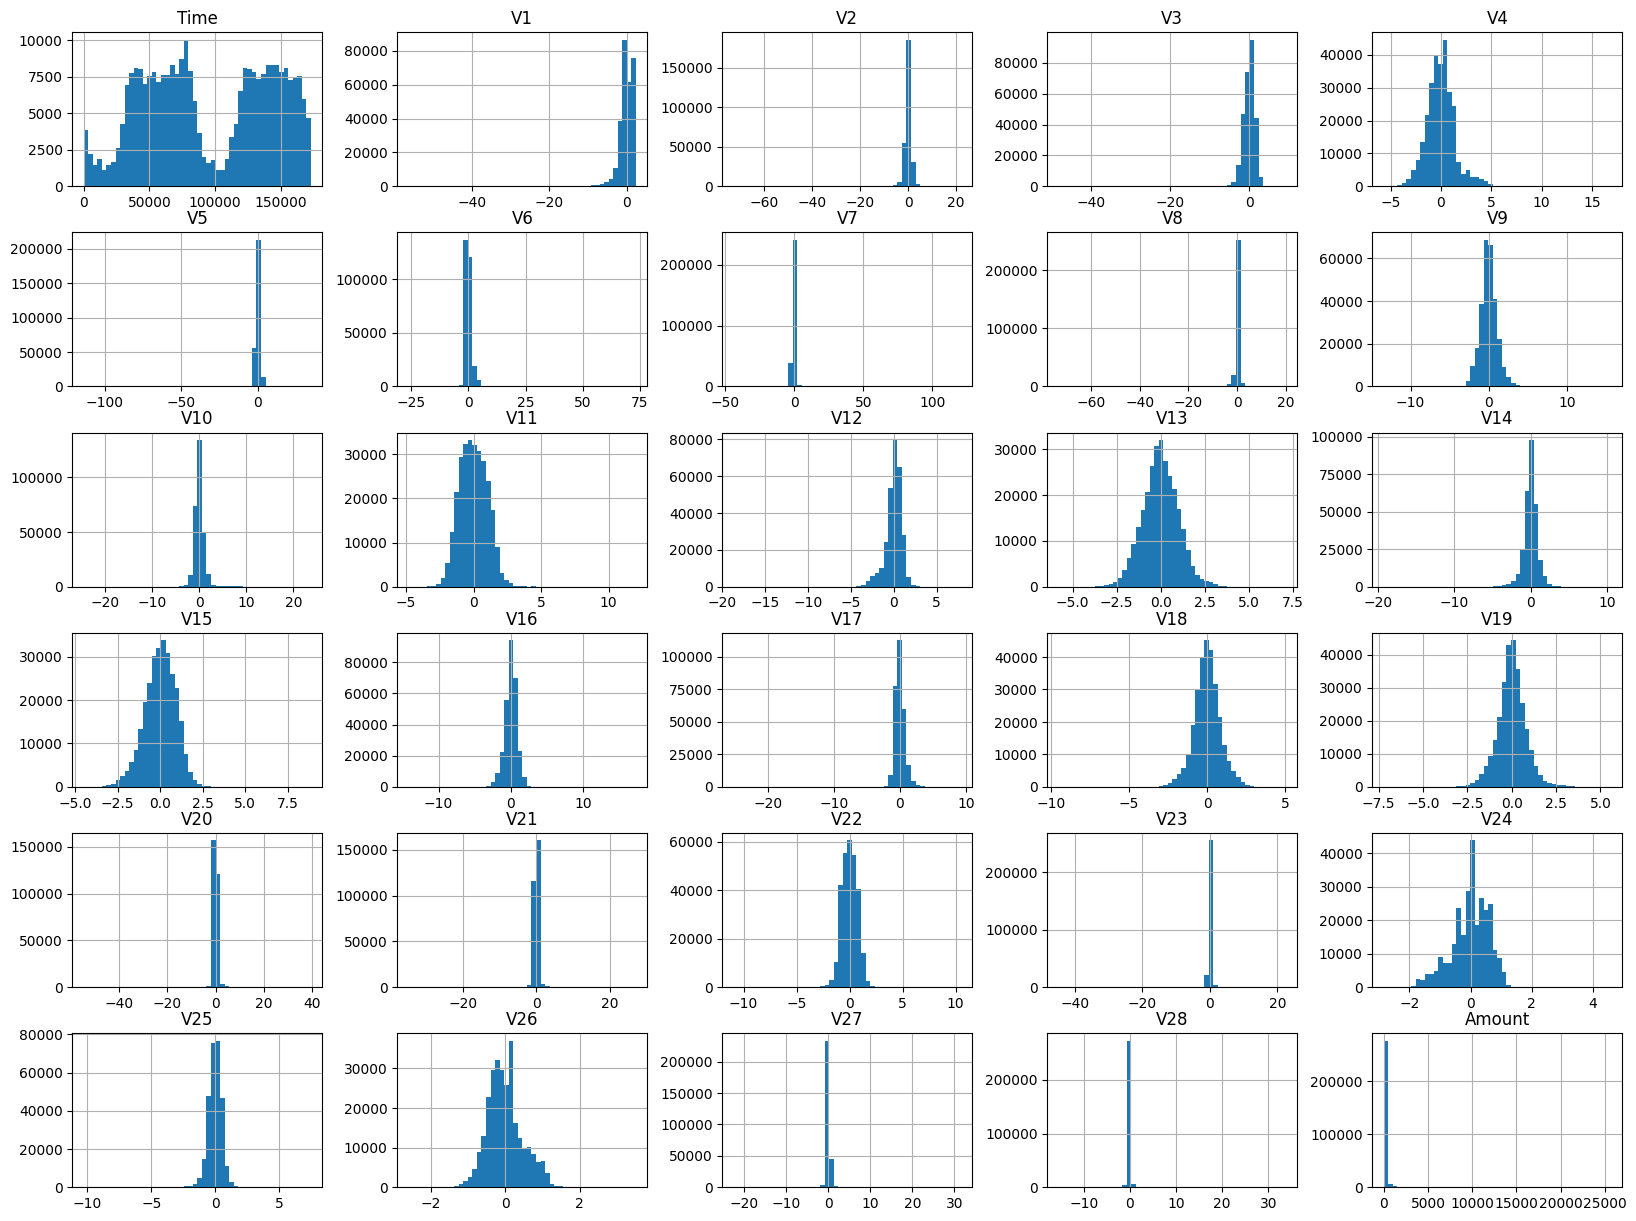

In [7]:
# Histogram untuk setiap fitur
df.drop('Class', axis=1).hist(bins=50, figsize=(20,15))
plt.show()

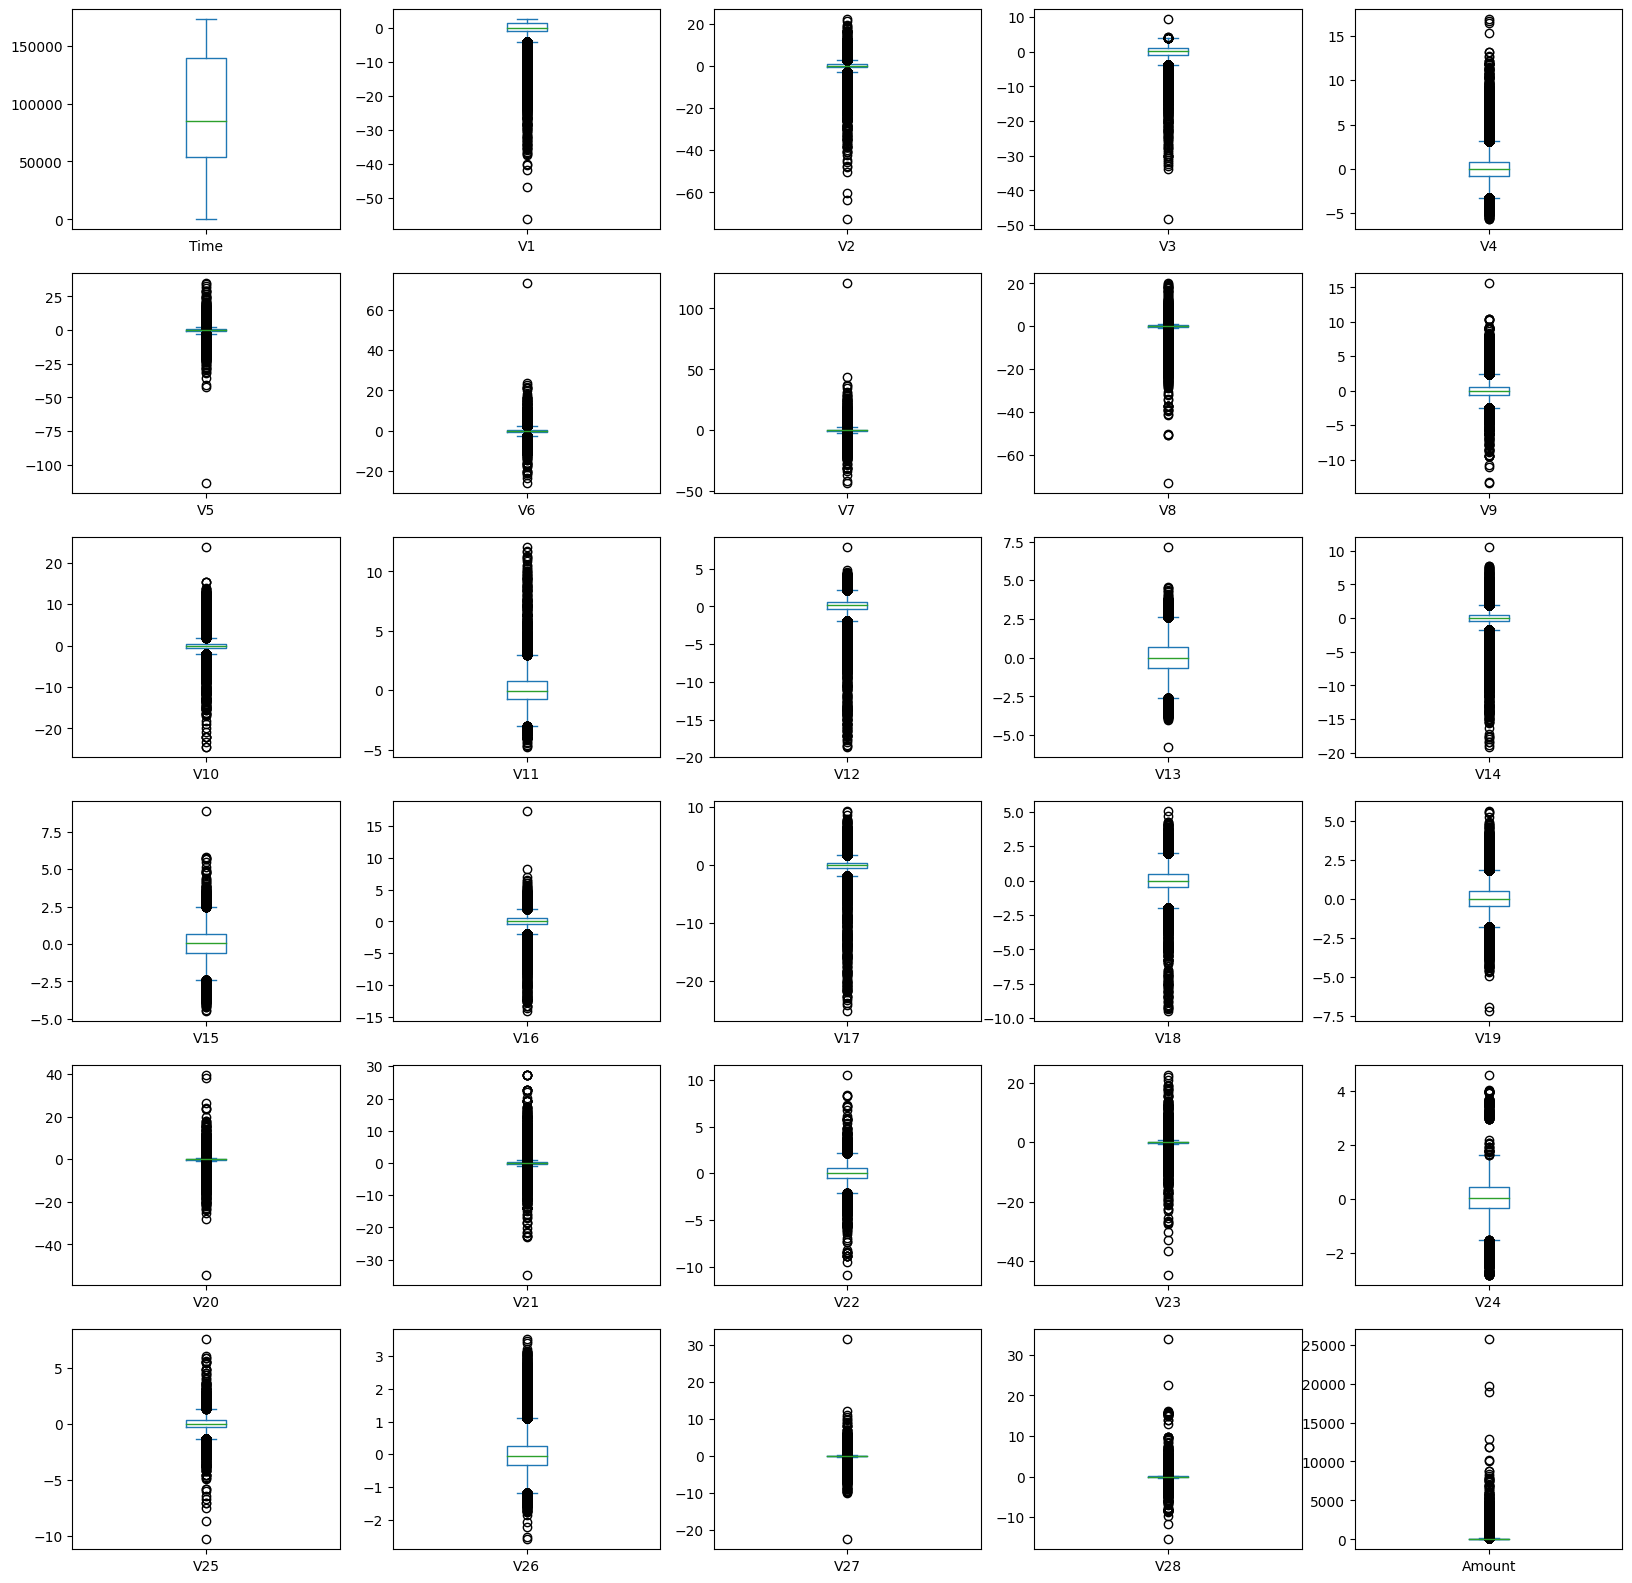

In [8]:
# Boxplot untuk setiap fitur
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,5), figsize=(20,20))
plt.show()

prompt: buatlah model SVM sesuai dataset ini

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load data
df = pd.read_csv(file_path) # Ganti dengan lokasi file yang sesuai

# Definisikan fitur dan target
X = df.drop('Class', axis=1)
y = df['Class']

# Skalakan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Pelatihan model SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Lakukan prediksi pada set pengujian
y_pred = svm_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')


Akurasi Model: 99.93%


In [16]:
# Data baru (semua fitur memiliki nilai yang sama seperti contoh)
new_data = {
    'Time': [150.0],
    'V1': [0.5],
    'V2': [-0.2],
    'V3': [0.3],
    'V4': [0.4],
    'V5': [-0.5],
    'V6': [-0.6],
    'V7': [0.7],
    'V8': [0.8],
    'V9': [-0.9],
    'V10': [1.0],
    'V11': [-1.1],
    'V12': [1.2],
    'V13': [-1.3],
    'V14': [1.4],
    'V15': [-1.5],
    'V16': [1.6],
    'V17': [-1.7],
    'V18': [1.8],
    'V19': [-1.9],
    'V20': [2.0],
    'V21': [-2.1],
    'V22': [2.2],
    'V23': [-2.3],
    'V24': [2.4],
    'V25': [-2.5],
    'V26': [2.6],
    'V27': [-2.7],
    'V28': [2.8],
    'Amount': [100.0]  # Contoh nilai Amount
}

# Buat DataFrame dari data baru
new_df = pd.DataFrame(new_data)

# Skalakan data baru menggunakan StandardScaler yang sama
new_scaled_data = scaler.transform(new_df)

# Lakukan prediksi dengan model SVM
new_prediction = svm_model.predict(new_scaled_data)

print(f'Prediksi Kelas: {new_prediction[0]}')


Prediksi Kelas: 0
